In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from pandas import DataFrame
from datetime import datetime
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten, Reshape, Activation
from keras.layers import Conv1D, MaxPooling1D ,AveragePooling1D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras import backend as K
from keras.callbacks import ModelCheckpoint, CSVLogger
from keras.optimizers import Adam, RMSprop
from keras.layers import Input, Dense, Conv1D, MaxPooling1D
from keras.layers import Flatten, Concatenate, Dropout, Reshape, BatchNormalization
from keras.models import Model


C:\Users\a\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\a\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\a\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\a\AppData\Roaming\Python\Python37\site-packages\tensorf

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


# 출처: https://3months.tistory.com/206 [Deep Play]

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6979699784006865216
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10116497408
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13755822795654263064
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [3]:
workdir = "E://Ronny_TF//201120_EDC_EYDC_MDC_other_PC//Dataset_EDC_EYDC_MDC_regen"

In [4]:
# < Important note > [ Please download input data from https://mega.nz/#F!CeYGDKyS!uqkmWJ4E2XSGJp_C2VO2gg]
# IC50evaluation//Dataset//Scenario3_EYDC-9K_minmax

dataset = np.load(workdir + "//EYDC9K_dataset.npz") # input file
ss0 = np.load(workdir + '//EYDC9K_dataset_r0_9_1.npz') # split for training and test

In [5]:
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [6]:
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]

# In[9]:
# ori = training_image_array
# bat = np.zeros((ori.shape[0],178))
# cat = np.hstack([ori,bat])
# training_image_array = cat

# # In[8]:
# training_image_array.shape

# # In[10]:
# ori2 = test_image_array
# bat2 = np.zeros((ori2.shape[0],178))
# cat2 = np.hstack([ori2,bat2])
# test_image_array = cat2


In [7]:
# In[15]:
ab =[]
for i in range(100,200):
    ab.append(len(training_image_array) % i)
    
print(min(ab), ab.index(min(ab)))

0 37


In [8]:
x.shape

(9590, 41505)

In [9]:
training_image_array.shape

(8631, 41505)

In [10]:
# In[21]:

num_classes = 1
learning_rate = 0.0002
training_epochs = 150
batch_size = 100
img_rows, img_cols = 154, 154


In [11]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array

# if K.image_data_format() == 'channels_first':
#     train_X = train_X.reshape(train_X.shape[0], 1, img_rows, img_cols)
#     test_X = test_X.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1)
#     test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)


In [12]:
shape_value = 39180
print(shape_value)

39180


In [13]:
train_X.shape

(8631, 41505)

In [14]:
train_X_cell = train_X[:,:shape_value]
train_X_drug =train_X[:,shape_value:]
test_X_cell = test_X[:,:shape_value]
test_X_drug = test_X[:,shape_value:]

In [15]:
train_X_cell.shape

(8631, 39180)

In [16]:
train_X_cell = train_X_cell.reshape(train_X_cell.shape[0], train_X_cell.shape[1], 1)
train_X_drug = train_X_drug.reshape(train_X_drug.shape[0], train_X_drug.shape[1], 1)
test_X_cell = test_X_cell.reshape(test_X_cell.shape[0], test_X_cell.shape[1], 1)
test_X_drug = test_X_drug.reshape(test_X_drug.shape[0], test_X_drug.shape[1], 1)
#input_shape = (img_rows, img_cols, 1)

In [17]:
print(train_X_cell.shape,train_X_drug.shape, train_y.shape, test_X_cell.shape,test_X_drug.shape, test_y.shape)

(8631, 39180, 1) (8631, 2325, 1) (8631,) (959, 39180, 1) (959, 2325, 1) (959,)


In [18]:
train_X_cell.shape

(8631, 39180, 1)

In [19]:
train_X_cell = train_X_cell.astype('float32')
test_X_cell = test_X_cell.astype('float32')
train_X_drug = train_X_drug.astype('float32')
test_X_drug = test_X_drug.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (8631, 41505)
8631 train samples
959 test samples


In [20]:
with K.tf.device('/GPU:0'):
    input_cell = Input(shape=(train_X_cell.shape[1], train_X_cell.shape[2]), name='cell_input')
    input_drug = Input(shape=(train_X_drug.shape[1], train_X_drug.shape[2]), name='drug_input')

    conv_cell_line_1 = Conv1D(filters=50, kernel_size=700, strides=5, activation='tanh')(input_cell)
    maxpool_cell_line_1 = MaxPooling1D(pool_size=5)(conv_cell_line_1)
    conv_cell_line_2 = Conv1D(filters=30, kernel_size=5, strides=2, activation='relu')(maxpool_cell_line_1)
    maxpool_cell_line_2 = MaxPooling1D(pool_size=10)(conv_cell_line_2)
    flatten_cell_line = Flatten()(maxpool_cell_line_2)
    dense_cell_line = Dense(100, activation='relu')(flatten_cell_line)
    dropout_cell_line = Dropout(0.1)(dense_cell_line)

    conv_drug_1 = Conv1D(filters=50, kernel_size=200, strides=3, activation='tanh')(input_drug)
    maxpool_drug_1 = MaxPooling1D(pool_size=5)(conv_drug_1)
    conv_drug_2 = Conv1D(filters=30, kernel_size=50, strides=5, activation='relu')(maxpool_drug_1)
    maxpool_drug_2 = MaxPooling1D(pool_size=10)(conv_drug_2)
    flatten_drug = Flatten()(maxpool_drug_2)
    dense_drug = Dense(100, activation='relu')(flatten_drug)
    dropout_drug = Dropout(0.1)(dense_drug)

    concatenate = Concatenate()([dropout_cell_line, dropout_drug])
    dense_1 = Dense(300, activation='tanh')(concatenate)
    dropout_1 = Dropout(0.1)(dense_1)
    reshape_1 = Reshape((300,1))(dropout_1)
    conv_1 = Conv1D(filters=30, kernel_size=150, strides=1, activation='relu')(reshape_1)
    maxpool_1 = MaxPooling1D(pool_size=2)(conv_1)
    conv_2 = Conv1D(filters=10, kernel_size=5, strides=1, activation='relu')(maxpool_1)
    maxpool_2 = MaxPooling1D(pool_size=3)(conv_2)
    conv_3 = Conv1D(filters=5, kernel_size=5, strides=1, activation='relu')(maxpool_2)
    maxpool_3 = MaxPooling1D(pool_size=3)(conv_3)
    dropout_2 = Dropout(0.1)(maxpool_3)
    flatten = Flatten()(dropout_2)
    dropout_3 = Dropout(0.2)(flatten)
    output = Dense(1, activation='linear', name='pred_lnIC50')(dropout_3)
    model = Model(inputs=[input_cell, input_drug], outputs=output, name='MasterModel')



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [21]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
cell_input (InputLayer)         (None, 39180, 1)     0                                            
__________________________________________________________________________________________________
drug_input (InputLayer)         (None, 2325, 1)      0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 7697, 50)     35050       cell_input[0][0]                 
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 709, 50)      10050       drug_input[0][0]                 
__________________________________________________________________________________________________
max_poolin

In [22]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

In [23]:
optim = Adam(lr=0.0002)

model.compile(loss='mse',
		      optimizer=optim,
			  metrics=['mse','mae'])

StartTime8 = datetime.now()
print("StartTime :", StartTime8)
with K.tf.device('/GPU:0'):
    model_train = model.fit([train_X_cell, train_X_drug], train_y, validation_data=([test_X_cell, test_X_drug], test_y),
                            batch_size=batch_size,epochs=training_epochs,verbose=1)

EndTime8 = datetime.now()
print("EndTime :", EndTime8)

StartTime : 2020-11-23 16:40:43.299002
Instructions for updating:
Use tf.cast instead.
Train on 8631 samples, validate on 959 samples
Epoch 1/150
8631/8631 [==============================] - 8s 914us/step - loss: 3.9990 - mean_squared_error: 3.9990 - mean_absolute_error: 1.6129 - val_loss: 2.8719 - val_mean_squared_error: 2.8719 - val_mean_absolute_error: 1.2504
Epoch 2/150
8631/8631 [==============================] - 5s 617us/step - loss: 1.8870 - mean_squared_error: 1.8870 - mean_absolute_error: 0.9964 - val_loss: 1.4420 - val_mean_squared_error: 1.4420 - val_mean_absolute_error: 0.6349
Epoch 3/150
8631/8631 [==============================] - 5s 610us/step - loss: 1.3995 - mean_squared_error: 1.3995 - mean_absolute_error: 0.8272 - val_loss: 1.2559 - val_mean_squared_error: 1.2559 - val_mean_absolute_error: 0.6161
Epoch 4/150
8631/8631 [==============================] - 5s 608us/step - loss: 1.3029 - mean_squared_error: 1.3029 - mean_absolute_error: 0.7923 - val_loss: 1.2046 - val_mea

Epoch 35/150
8631/8631 [==============================] - 5s 614us/step - loss: 0.7368 - mean_squared_error: 0.7368 - mean_absolute_error: 0.6007 - val_loss: 0.8120 - val_mean_squared_error: 0.8120 - val_mean_absolute_error: 0.5097
Epoch 36/150
8631/8631 [==============================] - 5s 614us/step - loss: 0.7285 - mean_squared_error: 0.7285 - mean_absolute_error: 0.5978 - val_loss: 0.8361 - val_mean_squared_error: 0.8361 - val_mean_absolute_error: 0.5214
Epoch 37/150
8631/8631 [==============================] - 5s 616us/step - loss: 0.7221 - mean_squared_error: 0.7221 - mean_absolute_error: 0.5942 - val_loss: 0.8224 - val_mean_squared_error: 0.8224 - val_mean_absolute_error: 0.5466
Epoch 38/150
8631/8631 [==============================] - 5s 614us/step - loss: 0.7190 - mean_squared_error: 0.7190 - mean_absolute_error: 0.5950 - val_loss: 0.8805 - val_mean_squared_error: 0.8805 - val_mean_absolute_error: 0.5473
Epoch 39/150
8631/8631 [==============================] - 5s 616us/step 

8631/8631 [==============================] - 5s 628us/step - loss: 0.5857 - mean_squared_error: 0.5857 - mean_absolute_error: 0.5341 - val_loss: 0.8046 - val_mean_squared_error: 0.8046 - val_mean_absolute_error: 0.5393
Epoch 71/150
8631/8631 [==============================] - 5s 628us/step - loss: 0.5686 - mean_squared_error: 0.5686 - mean_absolute_error: 0.5253 - val_loss: 0.7491 - val_mean_squared_error: 0.7491 - val_mean_absolute_error: 0.5064
Epoch 72/150
8631/8631 [==============================] - 5s 626us/step - loss: 0.5592 - mean_squared_error: 0.5592 - mean_absolute_error: 0.5241 - val_loss: 0.8282 - val_mean_squared_error: 0.8282 - val_mean_absolute_error: 0.5190
Epoch 73/150
8631/8631 [==============================] - 5s 627us/step - loss: 0.5575 - mean_squared_error: 0.5575 - mean_absolute_error: 0.5191 - val_loss: 0.7535 - val_mean_squared_error: 0.7535 - val_mean_absolute_error: 0.5252
Epoch 74/150
8631/8631 [==============================] - 5s 626us/step - loss: 0.571

8631/8631 [==============================] - 5s 628us/step - loss: 0.4985 - mean_squared_error: 0.4985 - mean_absolute_error: 0.4936 - val_loss: 0.7979 - val_mean_squared_error: 0.7979 - val_mean_absolute_error: 0.5501
Epoch 106/150
8631/8631 [==============================] - 5s 628us/step - loss: 0.5103 - mean_squared_error: 0.5103 - mean_absolute_error: 0.4943 - val_loss: 0.8191 - val_mean_squared_error: 0.8191 - val_mean_absolute_error: 0.5271
Epoch 107/150
8631/8631 [==============================] - 5s 629us/step - loss: 0.4923 - mean_squared_error: 0.4923 - mean_absolute_error: 0.4853 - val_loss: 0.7958 - val_mean_squared_error: 0.7958 - val_mean_absolute_error: 0.5470
Epoch 108/150
8631/8631 [==============================] - 5s 627us/step - loss: 0.4942 - mean_squared_error: 0.4942 - mean_absolute_error: 0.4880 - val_loss: 0.9113 - val_mean_squared_error: 0.9113 - val_mean_absolute_error: 0.5253
Epoch 109/150
8631/8631 [==============================] - 5s 630us/step - loss: 0

8631/8631 [==============================] - 5s 626us/step - loss: 0.4540 - mean_squared_error: 0.4540 - mean_absolute_error: 0.4648 - val_loss: 0.8286 - val_mean_squared_error: 0.8286 - val_mean_absolute_error: 0.5215
Epoch 141/150
8631/8631 [==============================] - 5s 626us/step - loss: 0.4637 - mean_squared_error: 0.4637 - mean_absolute_error: 0.4692 - val_loss: 0.7722 - val_mean_squared_error: 0.7722 - val_mean_absolute_error: 0.5201
Epoch 142/150
8631/8631 [==============================] - 5s 626us/step - loss: 0.4407 - mean_squared_error: 0.4407 - mean_absolute_error: 0.4619 - val_loss: 0.8119 - val_mean_squared_error: 0.8119 - val_mean_absolute_error: 0.5194
Epoch 143/150
8631/8631 [==============================] - 5s 630us/step - loss: 0.4548 - mean_squared_error: 0.4548 - mean_absolute_error: 0.4617 - val_loss: 0.8055 - val_mean_squared_error: 0.8055 - val_mean_absolute_error: 0.5338
Epoch 144/150
8631/8631 [==============================] - 5s 625us/step - loss: 0

In [24]:
import json
from keras.models import model_from_json, load_model
workdir = "E://Ronny_TF//201120_EDC_EYDC_MDC_other_PC//Result//EYDC9K//CNN"
# Option 1: Save Weights + Architecture
model.save_weights(workdir+ '//EYDC9K_CNN_model_fix_v3.h5')
with open(workdir + '//EYDC9K_CNN_model_architecture_fix_v3.json', 'w') as f:
    f.write(model.to_json())
# Option 1: Load Weights + Architecture
# with open('model_architecture.json', 'r') as f:
#     new_model_1 = model_from_json(f.read())
# new_model_1.load_weights('model_weights.h5')

In [25]:
# Option 2: Save/Load the Entire Model
from keras.models import load_model

# Creates a HDF5 file 'my_model.h5'
model.save(workdir + '//EYDC9K_CNN_model_fix_2080ti_v3.h5')

# Deletes the existing model
# del model  

# Returns a compiled model identical to the previous one
# model = load_model('my_model.h5')

In [26]:
test_eval = model.evaluate([test_X_cell,test_X_drug], test_label_array, verbose=1)

959/959 [==============================] - 0s 404us/step


In [27]:
test_eval

[0.7988976286772766, 0.7988976286772766, 0.5448696220505349]

In [28]:
accuracy = model_train.history['mean_squared_error']
val_accuracy = model_train.history['val_mean_squared_error']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']

np_acc = np.array(accuracy)
np_val_acc = np.array(val_accuracy)
np_loss = np.array(loss)
np_val_loss = np.array(val_loss)

In [29]:
import matplotlib
from matplotlib import pyplot as plt

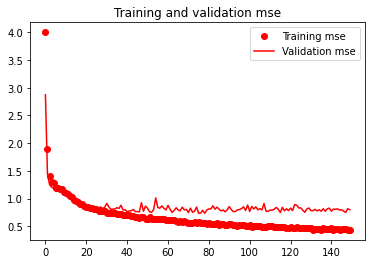

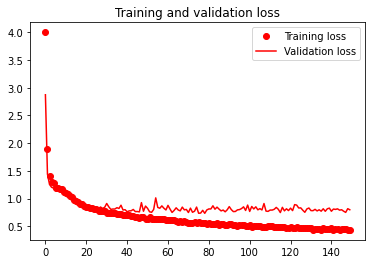

In [30]:
# accuracy = model_train.history['acc']
# val_accuracy = model_train.history['val_acc']
# loss = model_train.history['loss']
# val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training mse',c='red')
plt.plot(epochs, val_accuracy, 'b', label='Validation mse',c='red')
plt.title('Training and validation mse')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss',c='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss',c='red')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [31]:
predicted_classes = model.predict([test_X_cell,test_X_drug])

In [32]:
predicted_value = predicted_classes

In [33]:
a = pd.DataFrame(predicted_value)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]

In [34]:
c.to_csv(workdir + '//EYDC9K_CNN_pred_obs_table.csv')

In [35]:
c

,Predicted,Test
0,1.951553,2.079442
1,0.624354,2.079442
2,-2.138736,-1.507775
3,1.898003,2.079442
4,1.060858,1.111349
...,...,...
954,1.861254,2.079442
955,-2.077541,-2.526984
956,1.978134,2.079442
957,1.929499,2.079442


In [36]:
predicted_value.shape

(959, 1)

In [37]:
from scipy.stats import linregress
linregress(b[0], a[0])

LinregressResult(slope=0.8501419865358978, intercept=0.01842763522848312, rvalue=0.8956073635697748, pvalue=0.0, stderr=0.013649821352605814)

In [38]:
from sklearn.metrics import r2_score
r2_value = r2_score(b,a)
print(r2_value)

0.7959443132296693


In [39]:
rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 0.893810732138493


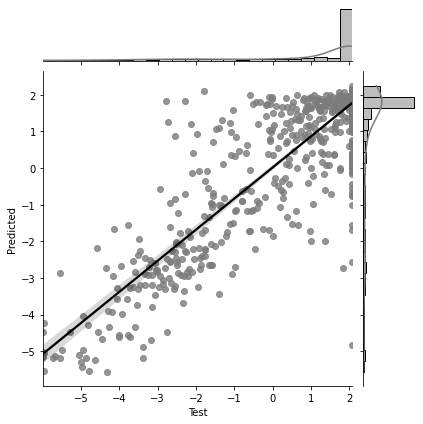

In [40]:
workdir = "E://Ronny_TF//201120_EDC_EYDC_MDC_other_PC//Result//Fig_backbone//EYDC9K"
import seaborn as sns

g = sns.jointplot(x="Test", y="Predicted", data=c, kind='reg', color='#7C7C7C',
                  joint_kws={'line_kws':{'color':'black'}})
g.savefig(workdir+ '//EYDC9K_CNN.png', dpi=300)